In [1]:
# import necessities
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
#


In [2]:
# read data files
whale_set = pd.read_csv("whale_returns.csv")
algo_set = pd.read_csv("algo_returns.csv")
sp500_set = pd.read_csv("sp500_history.csv")
#
# test data file read
# whale_set.head() - yes
# algo_set.head() - yes
# sp500_set.head() - yes


In [3]:
# convert dates to datetimeIndex and sorted by index
whale_set.set_index(pd.to_datetime(whale_set["Date"], infer_datetime_format = True), inplace = True)
whale_set.drop(columns = ["Date"], inplace = True)
whale_set.sort_index()
whale_set.head() # - data starts at 03/02/15
#
algo_set.set_index(pd.to_datetime(algo_set["Date"], infer_datetime_format = True), inplace = True)
algo_set.drop(columns = ["Date"], inplace = True)
algo_set.sort_index()
# algo_set.head() - data starts at 05/28/14 for Algo1, Algo 2 is NaN
#
sp500_set.set_index(pd.to_datetime(sp500_set["Date"], infer_datetime_format = True), inplace = True)
sp500_set.drop(columns = ["Date"], inplace = True)
sp500_set.sort_index()
# sp500_set.head() - data starts on 04/23/19


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [4]:
# clean whale_set
# count whale_set nulls
whale_set.isnull().sum()
# drop whale_set nulls
whale_set.dropna(inplace = True)
# whale_set.isnull().sum() - confirmed
#
# check whale_set for duplicates
# whale_set.duplicated() - confirmed no duplicates


In [5]:
# clean algo_set
# count algo_set nulls
algo_set.isnull().sum()
# drop algo_set nulls
algo_set.dropna(inplace = True)
# algo_set.isnull().sum() - confirmed
#
# check algo_set for duplicates
# algo_set.duplicated() - confirmed no duplicates
#


In [6]:
# clean sp500_set
# count sp500_set nulls
sp500_set.isnull().sum()
sp500_set.dropna(inplace = True)
# sp500_set.isnull().sum() - confirmed
#
# check sp500_set for duplicates
# sp500_set.duplicated() - confirmed no duplicates
#


In [7]:
# remove dollar signs and convert data types if necessary
# whale_set.head() - no $ signs
# whale_set.dtypes - all float64
#
# algo_set.head() - no $ signs
# algo_set.dtypes - all float64
#
# sp500_set.head()
# remove $ from sp500 data
sp500_set["Close"] = sp500_set["Close"].str.replace('$', ' ')
# sp500_set.head() - $ signs removed
# sp500_set.dtypes
# change sp500 close elements from objects to float64
sp500_set["Close"] = sp500_set["Close"].astype("float")
# sp500_set.dtypes
# sp500_set data changed from object to float
# all data sets cleaned and data types aligned
#


In [8]:
# convert sp500 closing prices to daily returns ((close price_y - close price_t)/close price_t)
sp500_dayreturns = sp500_set.pct_change()
# change column name from close to daily return
sp500_set["S & P Daily Return"] = sp500_dayreturns
del sp500_set["Close"]
# sp500_set.head() - confirmed sp500 new column of daily return, dropped close
#


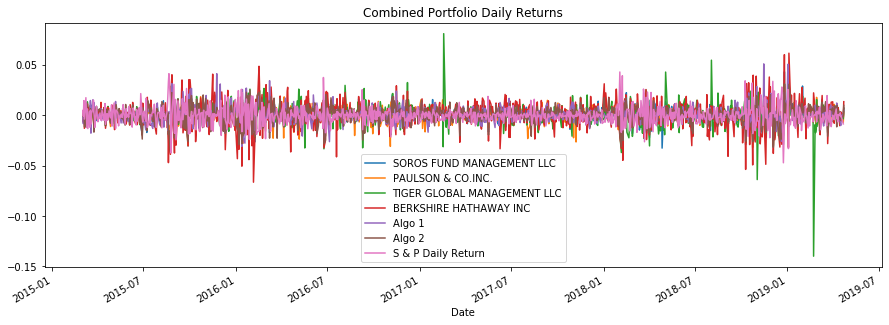

In [9]:
# join three portfolios
# quick data check first as separate dataframes
# whale_set.head() - confirmed, first date is 03/02/2015
# algo_set.head() - both columns have numbers, first date is 06/05/2014
# sp500_set.head() - column is daily return, first date is 04/23/2019
#
combined_ports = pd.concat([whale_set, algo_set, sp500_set], axis = "columns", join = "inner")
# print(combined_ports) - confirmed all grouped together
#
# plot daily returns
combined_ports.plot(figsize = (15,5), title="Combined Portfolio Daily Returns")
#


'Based on the cumlative returns chart, all of the portfolios outperform the SP500 over this time frame.  However, the Algo 1 seems to do it best.'

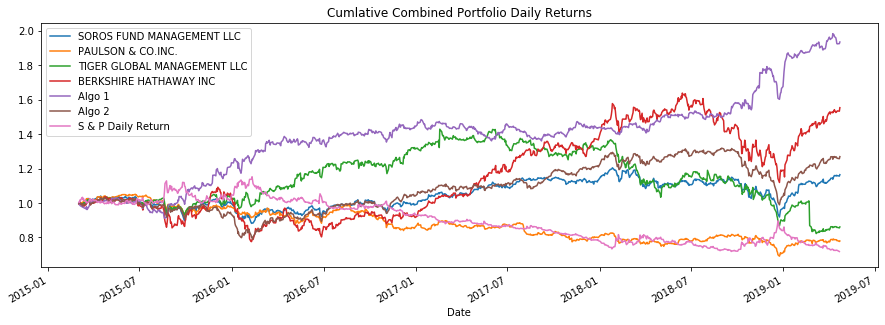

In [13]:
# calculate and plot cumlative returns
cum_comb_port = (1 + combined_ports).cumprod()
cum_comb_port.plot(figsize = (15,5), title = "Cumlative Combined Portfolio Daily Returns")
## print('CHECKING CUM COMB PORT FOR DATE FORMAT', cum_comb_port)
##cum_comb_port.plot(xlim = [2015-1-1, 2019-5-1], figsize = (15,5), title = "Cumlative Combined Portfolio Daily Returns")
#
"""Based on the cumlative returns chart, all of the portfolios outperform the SP500 over this time frame.  However, the Algo 1 seems to do it best."""
#


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


' Berkshire Hathaway seems to have the largest spread based on the box plots.  Algo 1 has the smallest spread amongst the portfolios, not considering the SP 500 index.'

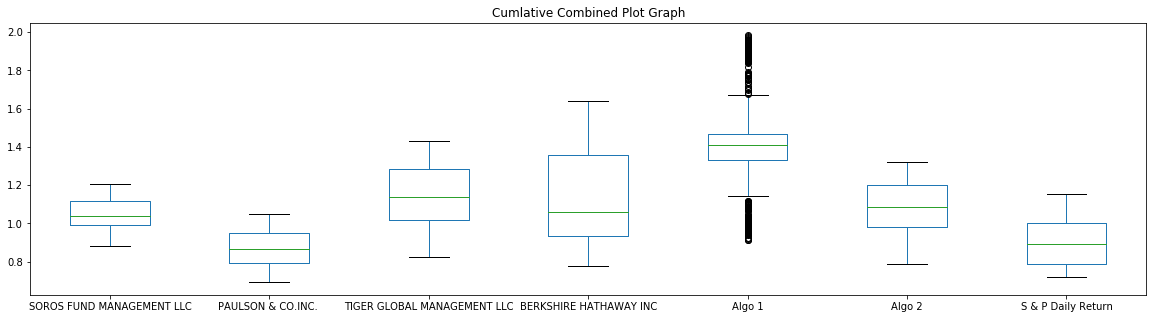

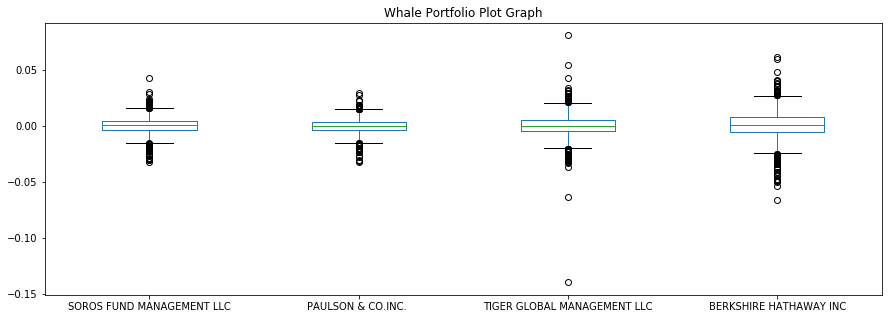

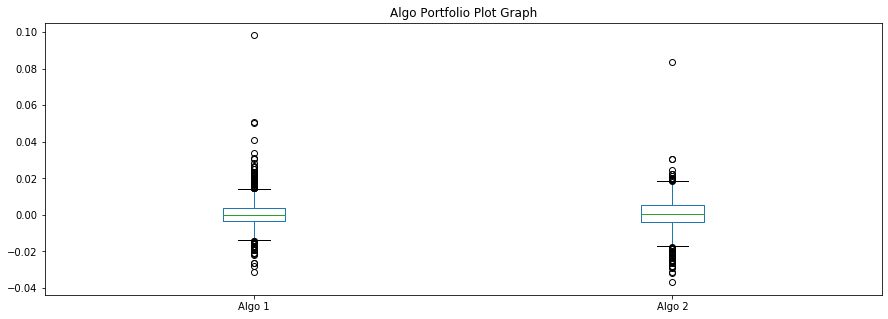

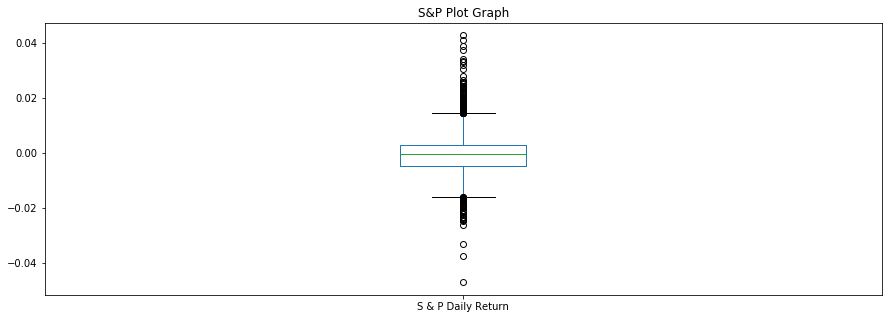

In [14]:
# create box plots for each category for analysis
print(cum_comb_port.plot.box(figsize =(20,5), title = 'Cumlative Combined Plot Graph'))
print(whale_set.plot.box(figsize =(15,5), title = 'Whale Portfolio Plot Graph'))
print(algo_set.plot.box(figsize =(15,5), title = 'Algo Portfolio Plot Graph'))
print(sp500_set.plot.box(figsize =(15,5), title = 'S&P Plot Graph'))
#
""" Berkshire Hathaway seems to have the largest spread based on the box plots.  Algo 1 has the smallest spread amongst the portfolios, not considering the SP 500 index."""
#


In [16]:
# calculate the standard deviation for each portfolio, must use the daily returns to get the daily average for each portfolio
whale_std = whale_set.std()
algo_std = algo_set.std()
sp500_std = sp500_set.std()
combined_ports_std = pd.concat([whale_std, algo_std, sp500_std], axis = "rows", join = "inner")
print('STANDARD DEVIATION PER PORTFOLIO')
print(combined_ports_std)
#
""" In comparison to the S&P 500, which has a standard deviation of (+0.008135), Tiger Global (+0.010824) and Berkshire Hathaway (+0.012813) both have higher
standard deviations, which states they tend to be farther away from the mean, and thus are considered riskier than the S&P 500."""
#


STANDARD DEVIATION PER PORTFOLIO
SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
Algo 1                         0.007988
Algo 2                         0.008466
S & P Daily Return             0.008135
dtype: float64


' In comparison to the S&P 500, which has a standard deviation of (+0.008135), Tiger Global (+0.010824) and Berkshire Hathaway (+0.012813) both have higher\nstandard deviations, which states they tend to be farther away from the mean, and thus are considered riskier than the S&P 500.'

In [17]:
# calculate the annualized standard deviations
whale_yrstd = whale_std * np.sqrt(252)
algo_yrstd = algo_std * np.sqrt(252)
sp500_yrstd = sp500_std * np.sqrt(252)
combined_ports_yrstd = pd.concat([whale_yrstd, algo_yrstd, sp500_yrstd], axis = "rows", join = "inner")
print('COMBINED ANNUALIZED STANDARD DEVIATION')
print(combined_ports_yrstd)
#


COMBINED ANNUALIZED STANDARD DEVIATION
SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
Algo 1                         0.126801
Algo 2                         0.134401
S & P Daily Return             0.129133
dtype: float64


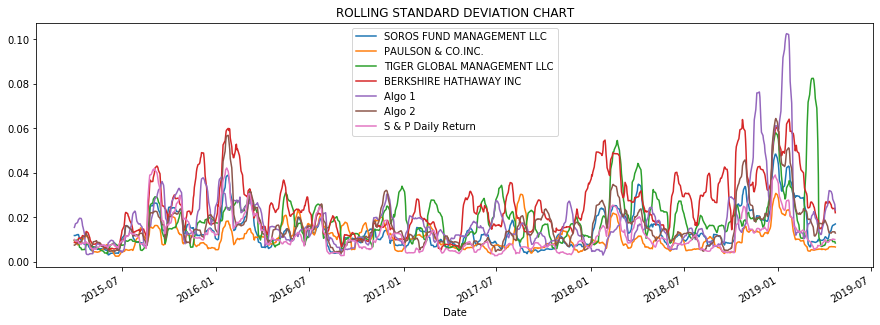

' The risk does increase for the portfolios as it increases for the S&P 500, and at a higher rate.'

In [18]:
# plot rolling standard deviation charts for the portfolios and S&P using a 21-day window
cum_comb_port.rolling(window = 21).std().plot(figsize=(15,5), title = 'ROLLING STANDARD DEVIATION CHART')
plt.show()
#
""" The risk does increase for the portfolios as it increases for the S&P 500, and at a higher rate."""
#

In [19]:
# construct correlation tables for algo, whale and sp500
whale_corset = whale_set.corr()
whale_corset.sort_index()
algo_corset = algo_set.corr()
algo_corset.sort_index()
sp500_corset = sp500_set.corr()
sp500_corset.sort_index()
combined_port_corr = pd.concat([whale_corset, algo_corset, sp500_corset], axis = "rows", join = "inner")
# print(algo_corset)
# print(sp500_corset)
##print('PORTFOLIO CORRELATION TABLE', combined_port_corr)


In [20]:
# combined_ports.head()
port_names = combined_ports.columns
combined_port_corr.set_index(port_names)
print('PORTFOLIO CORRELATION TABLE')
print(combined_port_corr)
#
""" All of my S&P returns are NaN, so I don't know which one closely mimics S&P. """
#

PORTFOLIO CORRELATION TABLE
Empty DataFrame
Columns: []
Index: [SOROS FUND MANAGEMENT LLC, PAULSON & CO.INC. , TIGER GLOBAL MANAGEMENT LLC, BERKSHIRE HATHAWAY INC, Algo 1, Algo 2, S & P Daily Return]


" All of my S&P returns are NaN, so I don't know which one closely mimics S&P. "

In [21]:
# choose one portfolio and create rolling beta of returns from that portfolio, compared with the S&P's returns
#
print('algo average', algo_set.mean())
# test out mean using long-hand
# algo_mean = algo_set.sum() / len(algo_set)
# print('algo mean long hand is ', algo_mean)
# average and long hand mean numbers match, so I can use .mean in equation
#
algo_variance = algo_set.var()
algo_covar = algo_set.cov()
algo_beta = algo_variance / algo_covar
#
print('Algo variance is ', algo_variance)
print('Algo covariance is ', algo_covar)
print('Algo beta is ', algo_beta)
#
sp500_variance = sp500_set.var()
sp500_covar = sp500_set.cov()
sp500_beta = sp500_variance / sp500_covar
#
print('S&P 500 variance is ', sp500_variance)
print('S&P 500 covariance is ', sp500_covar)
print('S&P 500 beta is ', sp500_beta)
#

algo average Algo 1    0.000654
Algo 2    0.000341
dtype: float64
Algo variance is  Algo 1    0.000064
Algo 2    0.000072
dtype: float64
Algo covariance is            Algo 1    Algo 2
Algo 1  0.000064  0.000023
Algo 2  0.000023  0.000072
Algo beta is            Algo 1    Algo 2
Algo 1  1.000000  3.058379
Algo 2  2.722276  1.000000
S&P 500 variance is  S & P Daily Return    0.000066
dtype: float64
S&P 500 covariance is                      S & P Daily Return
S & P Daily Return            0.000066
S&P 500 beta is                      S & P Daily Return
S & P Daily Return                 1.0


In [22]:
# combine Algo portfolio with S&P for beta comparison
beta_combo_ports = pd.concat([algo_beta, sp500_beta], axis = "rows", join = "inner")
print('BETA TABLE FOR ALGO AND S&P')
print(beta_combo_ports)
#
beta_combo_ports.plot(figsize = (15,5), title = "BETA PLOT FOR ALGO AND S&P")
plt.show()
""" The DataFrame is empty, so Algo's sensitivity to movement within S&P is inconclusive at this point."""
#

BETA TABLE FOR ALGO AND S&P
Empty DataFrame
Columns: []
Index: [Algo 1, Algo 2, S & P Daily Return]


TypeError: no numeric data to plot

SHARPE TABLE
SOROS FUND MANAGEMENT LLC     -0.168502
PAULSON & CO.INC.             -0.244108
TIGER GLOBAL MANAGEMENT LLC   -0.146027
BERKSHIRE HATHAWAY INC        -0.077874
Algo 1                        -0.105885
Algo 2                        -0.136900
S & P Daily Return            -0.233179
dtype: float64


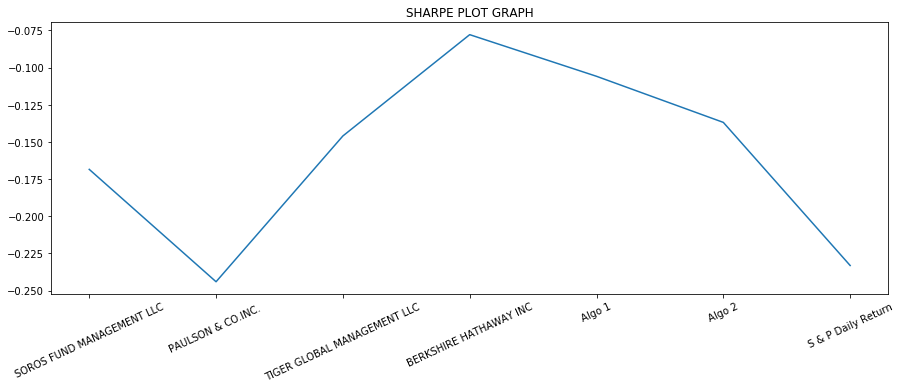

' According to the sharpe ratios, the Berkshire portfolio is the best invesstment.  The two algorithmic portfolios are ranked 2nd and 3rd, behind Berkshire, \nbut better than the whale portfolio and S&P. '

In [23]:
# calculate sharpe ratios for the portfolios
# sharpe ratio is the avg. portfolio return minus the risk-free rate
# divided by the standard deviation of the portfolio's excess return
# using the US Treasury 1yr of .015% (ycharts.com as of 05/17/20) as the risk-free rate for this calculation
us = .0015
whale_sharpe = (whale_set.mean() - us) / whale_std
algo_sharpe = (algo_set.mean() - us) / algo_std
sp500_sharpe = (sp500_set.mean() - us) / sp500_std
#
sharpe_comb = pd.concat([whale_sharpe, algo_sharpe, sp500_sharpe], axis = "rows", join = "inner")
print('SHARPE TABLE')
print(sharpe_comb)
#
sharpe_comb.plot(figsize=(15,5), title = 'SHARPE PLOT GRAPH')
plt.xticks(rotation=25)
plt.show()
#
""" According to the sharpe ratios, the Berkshire portfolio is the best invesstment.  The two algorithmic portfolios are ranked 2nd and 3rd, behind Berkshire, 
but better than the whale portfolio and S&P. """
#

In [24]:
# import custom portfolio
ibm_set = pd.read_csv("051820_IBM_prices.csv")
vz_set = pd.read_csv("051820_vz_prices.csv")
xom_set = pd.read_csv("051820_xom_prices.csv")
#
ibm_set.set_index(pd.to_datetime(ibm_set["Date"], infer_datetime_format = True), inplace = True)
ibm_set.drop(columns = ["Date"], inplace = True)
ibm_set.sort_index()
#
vz_set.set_index(pd.to_datetime(vz_set["Date"], infer_datetime_format = True), inplace = True)
vz_set.drop(columns = ["Date"], inplace = True)
vz_set.sort_index()
#
xom_set.set_index(pd.to_datetime(xom_set["Date"], infer_datetime_format = True), inplace = True)
xom_set.drop(columns = ["Date"], inplace = True)
xom_set.sort_index()
#

,Close
Date,
2015-01-02 16:00:00,92.83
2015-01-05 16:00:00,90.29
2015-01-06 16:00:00,89.81
2015-01-07 16:00:00,90.72
2015-01-08 16:00:00,92.23
...,...
2019-12-23 16:00:00,70.29
2019-12-24 13:00:00,70.02
2019-12-26 16:00:00,70.13


In [25]:
# calculate daily returns
ibm_dayreturns = ibm_set.pct_change()
# change column name from close to daily return
ibm_set["IBM Daily Return"] = ibm_dayreturns
del ibm_set["Close"]
#
vz_dayreturns = vz_set.pct_change()
# change column name from close to daily return
vz_set["VZ Daily Return"] = vz_dayreturns
del vz_set["Close"]
#
xom_dayreturns = xom_set.pct_change()
# change column name from close to daily return
xom_set["XOM Daily Return"] = xom_dayreturns
del xom_set["Close"]
#

In [26]:
# calculate standard deviation, variance, covariance, beta and sharpe ratios for customized portfolio
ibm_std = ibm_set.std()
ibm_variance = ibm_set.var()
ibm_covar = ibm_set.cov()
ibm_beta = ibm_variance / ibm_covar
ibm_sharpe = (ibm_set.mean() - us) / ibm_std
#
vz_std = vz_set.std()
vz_variance = vz_set.var()
vz_covar = vz_set.cov()
vz_beta = vz_variance / vz_covar
vz_sharpe = (vz_set.mean() - us) / vz_std
#
xom_std = xom_set.std()
xom_variance = xom_set.var()
xom_covar = xom_set.cov()
xom_beta = xom_variance / xom_covar
xom_sharpe = (xom_set.mean() - us) / xom_std
#


CUSTOM SHARPE TABLE
SOROS FUND MANAGEMENT LLC     -0.168502
PAULSON & CO.INC.             -0.244108
TIGER GLOBAL MANAGEMENT LLC   -0.146027
BERKSHIRE HATHAWAY INC        -0.077874
Algo 1                        -0.105885
Algo 2                        -0.136900
S & P Daily Return            -0.233179
IBM Daily Return              -0.120722
VZ Daily Return               -0.112703
XOM Daily Return              -0.136960
dtype: float64


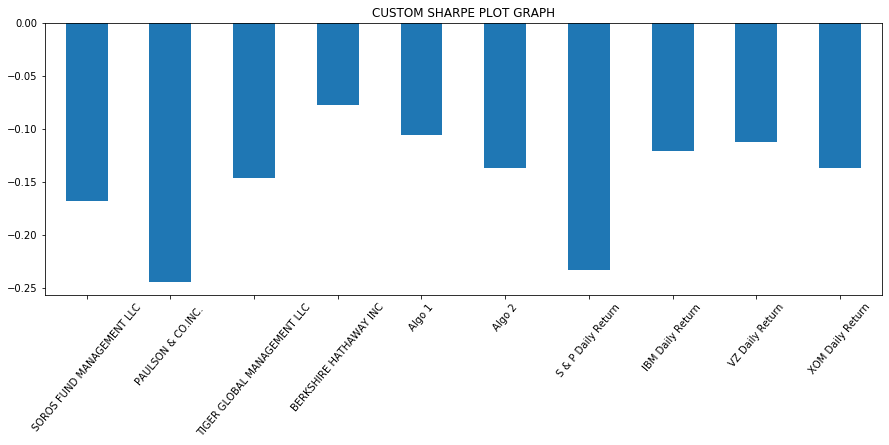

' The 3 stocks I chose, VZ, XOM and IBM, all perform worse than Berkshire, but better than the S&P 500.  Algo 1 performs second best, after Berkshire, \nbut the Algo 2 portfolio is worse than two in the customized portfolio, and slightly better than XOM. '

In [30]:
custom_sharpe_comb = pd.concat([whale_sharpe, algo_sharpe, sp500_sharpe, ibm_sharpe, vz_sharpe, xom_sharpe], axis = "rows", join = "inner")
print('CUSTOM SHARPE TABLE')
print(custom_sharpe_comb)
#
custom_sharpe_comb.plot(kind = 'bar', figsize=(15,5), title = 'CUSTOM SHARPE PLOT GRAPH')
plt.xticks(rotation=50)
plt.show()
#
""" The 3 stocks I chose, VZ, XOM and IBM, all perform worse than Berkshire, but better than the S&P 500.  Algo 1 performs second best, after Berkshire, 
but the Algo 2 portfolio is worse than two in the customized portfolio, and slightly better than XOM. """
